In [55]:
import pandas as pd
import matplotlib as plt
from matplotlib import figure, pyplot
from statistics import median, mean
import numpy as np
import scipy.stats as st
from numpy import nan
import math
import seaborn as sns
import statsmodels.api as sm

In [92]:
# Load in features
features = pd.read_csv(r"/Users/ilanadeutsch/Desktop/features.csv")
erodedFeatures = pd.read_csv(r"/Users/ilanadeutsch/Desktop/featuresEroded.csv")

# Initialize lists
all_feature_vals =[]
new_features = []
new_erodedFeatures = []
results = []

In [93]:
# Iterate through all features
for count, feature in enumerate(features):

    # Add all feature values to a list and elimanate NaN values
    all_feature_vals.extend(features[str(feature)])
    all_feature_vals.extend(erodedFeatures[str(feature)])
    all_feature_vals = [x for x in all_feature_vals if not(math.isnan(x))]

    # Add features to news lists and elimante NaN values
    new_features.extend(features[str(feature)])
    #new_features = [x for x in new_features if not(math.isnan(x))]
    new_erodedFeatures.extend(erodedFeatures[str(feature)])
    #new_erodedFeatures = [x for x in new_erodedFeatures if not(math.isnan(x))]

    # Find the mean values before and after erosion
    mean_val = mean(new_features)
    mean_eroded_val = mean(new_erodedFeatures)
    
    # Calculate standard deviations
    feature_var = np.var(new_features)
    eroded_feature_var = np.var(new_erodedFeatures)
    covariance = np.cov(new_features,new_erodedFeatures)[0,1]
   
    # Caclaculate r value
    r = (2*covariance)/(feature_var + eroded_feature_var + ((mean_val - mean_eroded_val)**2))

    # Append results
    results.append([feature, r])

    # Reset feature values lists
    all_feature_vals = []
    new_features = []
    new_erodedFeatures = []

# Append results to a dataframe
df = pd.DataFrame(results)


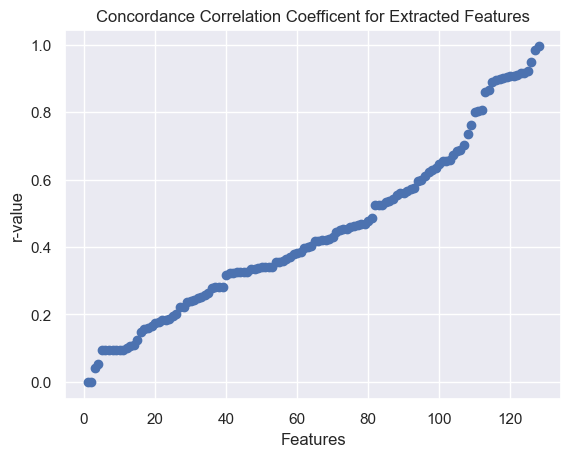

In [88]:
# Sort data frame by r valuea and export values
sorteddf=df.sort_values(by = 1)
sorteddf.to_excel(r"/Users/ilanadeutsch/Desktop/concordanceCorrelation.xlsx")

# Change feature names to numbers for plotting
for entryNum, entry in enumerate(sorteddf[0]):
    sorteddf.iloc[entryNum,0] = entryNum

# Plot r values of each feature from smallest to largest
sns.set_theme()
plt.pyplot.scatter(x= sorteddf.iloc[1:135,0],y = sorteddf.iloc[1:135,1])
plt.pyplot.title("Concordance Correlation Coefficent for Extracted Features")
plt.pyplot.xlabel("Features")
plt.pyplot.ylabel("r")
plt.pyplot.show()